In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
covid_deaths_original = pd.read_csv('covid_deaths.csv')

In [3]:
covid_deaths_original.shape

(31265, 15)

In [4]:
covid_deaths_original.describe()

,age,male,bid,malaysian,comorb
count,31265.000000,31265.000000,31265.000000,31265.000000,31265.000000
mean,61.423541,0.574412,0.202015,0.879450,0.774060
std,16.172543,0.494440,0.401510,0.325609,0.418206
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000,1.000000,1.000000
50%,62.000000,1.000000,0.000000,1.000000,1.000000
75%,73.000000,1.000000,0.000000,1.000000,1.000000
max,130.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
covid_deaths_original.head()

,date,date_announced,date_positive,date_dose1,date_dose2,date_dose3,brand1,brand2,brand3,state,age,male,bid,malaysian,comorb
0,2020-03-17,2020-03-17,2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,Johor,34,1,0,1,1
1,2020-03-17,2020-03-17,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,Sarawak,60,1,0,1,1
2,2020-03-20,2020-03-20,2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,Sabah,58,1,0,1,1
3,2020-03-21,2020-03-21,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,Kelantan,69,1,0,1,1
4,2020-03-21,2020-03-21,2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,Melaka,50,1,0,1,1


In [6]:
covid_deaths_original['comorb'].value_counts()

1    24201
0     7064
Name: comorb, dtype: int64

In [7]:
covid_deaths_original[covid_deaths_original['comorb'] == 0]

,date,date_announced,date_positive,date_dose1,date_dose2,date_dose3,brand1,brand2,brand3,state,age,male,bid,malaysian,comorb
125,2020-08-10,2021-08-31,2020-08-10,NaN,NaN,NaN,NaN,NaN,NaN,Melaka,43,1,0,1,0
280,2020-11-03,2020-11-05,2020-10-22,NaN,NaN,NaN,NaN,NaN,NaN,Sabah,54,1,0,1,0
299,2020-11-06,2020-11-09,2020-11-06,NaN,NaN,NaN,NaN,NaN,NaN,Sabah,65,0,1,0,0
306,2020-11-08,2020-11-09,2020-10-26,NaN,NaN,NaN,NaN,NaN,NaN,Sabah,66,1,0,1,0
310,2020-11-11,2020-11-13,2020-11-10,NaN,NaN,NaN,NaN,NaN,NaN,Sabah,70,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31217,2021-12-20,2021-12-23,2021-12-16,2021-09-22,2021-10-13,NaN,Sinovac,Sinovac,NaN,Kelantan,46,0,0,1,0
31221,2021-12-20,2021-12-22,2021-12-07,NaN,NaN,NaN,NaN,NaN,NaN,Pahang,59,1,0,1,0
31235,2021-12-20,2021-12-23,2021-12-01,2021-08-23,2021-09-13,NaN,Pfizer,Pfizer,NaN,Selangor,67,1,0,1,0
31244,2021-12-21,2021-12-23,2021-12-09,2021-08-23,2021-09-13,NaN,Sinovac,Sinovac,NaN,Johor,85,1,1,1,0


In [8]:
covid_deaths_original['age'] = pd.to_numeric(covid_deaths_original['age'])

In [9]:
# Remove cases with commorbities
covid_deaths = covid_deaths_original[covid_deaths_original['comorb'] == 0]

In [10]:
covid_deaths.shape

(7064, 15)

In [11]:
# Remove cases for ages above 65
# covid_deaths = covid_deaths[covid_deaths['age'] < 65]

In [12]:
covid_deaths.shape

(7064, 15)

In [13]:
# Individuals without 2 doses count
covid_deaths['brand2'].isnull().sum()

6459

In [14]:
# Remove unvaccinated or single dose, keep those with at least 2 doses
covid_deaths = covid_deaths[covid_deaths['brand2'].notnull()]

In [15]:
covid_deaths.shape

(605, 15)

In [16]:
covid_deaths_by_brand = covid_deaths.brand2.value_counts()
covid_deaths_by_brand

Sinovac             489
Pfizer              101
AstraZeneca          14
Pending VMS sync      1
Name: brand2, dtype: int64

In [17]:
sinovac_vaccinated_deaths_percentage = covid_deaths_by_brand["Sinovac"]/covid_deaths.shape[0] * 100
pfizer_vaccinated_deaths_percentage = covid_deaths_by_brand["Pfizer"]/covid_deaths.shape[0] * 100
az_vaccinated_deaths_percentage = covid_deaths_by_brand["AstraZeneca"]/covid_deaths.shape[0] * 100

In [18]:
print(f'Sinovac: {sinovac_vaccinated_deaths_percentage:.2f}%')
print(f'Pfizer: {pfizer_vaccinated_deaths_percentage:.2f}%')
print(f'AstraZeneca: {az_vaccinated_deaths_percentage:.2f}%')

Sinovac: 80.83%
Pfizer: 16.69%
AstraZeneca: 2.31%


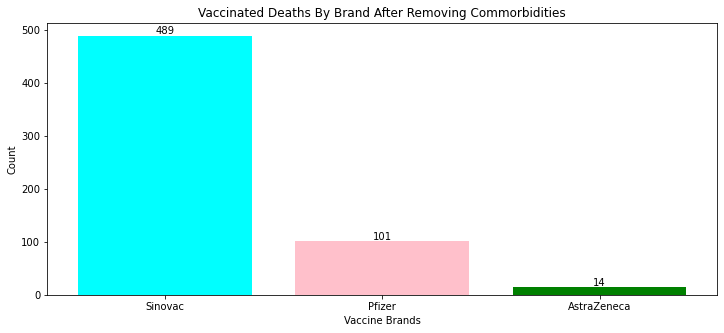

In [19]:
# covid_deaths_by_brand.plot(kind='bar', figsize=(12,5), color=['blue', 'orange', 'green'])

x = ['Sinovac', 'Pfizer', 'AstraZeneca']
y = [covid_deaths_by_brand.Sinovac, covid_deaths_by_brand.Pfizer, covid_deaths_by_brand.AstraZeneca]
plt.figure(figsize=(12, 5))
fig = plt.bar(x, height=y, color=['cyan', 'pink', 'green'])
plt.bar_label(fig)


plt.ylabel('Count')
plt.xlabel('Vaccine Brands')
plt.title('Vaccinated Deaths By Brand After Removing Commorbidities')
plt.show()


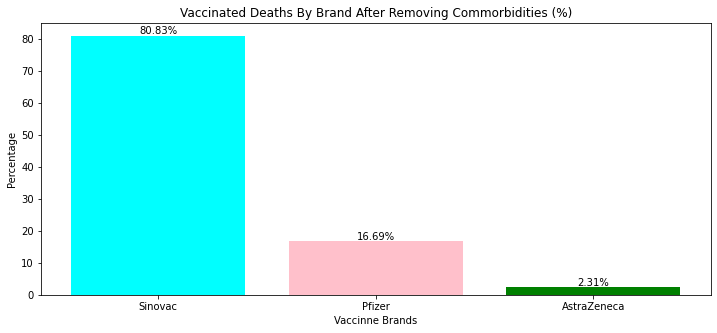

In [20]:
x = ['Sinovac', 'Pfizer', 'AstraZeneca']
y = [sinovac_vaccinated_deaths_percentage, pfizer_vaccinated_deaths_percentage, az_vaccinated_deaths_percentage]
plt.figure(figsize=(12, 5))
fig = plt.bar(x, height=y, color=['cyan', 'pink', 'green'])
plt.bar_label(fig, labels=['%.2f%%' % e for e in y])
plt.ylabel('Percentage')
plt.xlabel('Vaccinne Brands')
plt.title('Vaccinated Deaths By Brand After Removing Commorbidities (%)')

plt.show()

In [27]:
covid_deaths_sinovac = covid_deaths[covid_deaths['brand2'] == 'Sinovac']
sinovac_below_15 = covid_deaths_sinovac[covid_deaths_sinovac.age < 15].sum().sum()
sinovac_between_15_and_30 = covid_deaths_sinovac.age.between(15,30).sum()
sinovac_between_31_and_40 = covid_deaths_sinovac.age.between(31,40).sum()
sinovac_between_41_and_50 = covid_deaths_sinovac.age.between(41,50).sum()
sinovac_between_51_and_60 = covid_deaths_sinovac.age.between(51,60).sum()
sinovac_between_61_and_70 = covid_deaths_sinovac.age.between(61,70).sum()
sinovac_above_71 = covid_deaths_sinovac[covid_deaths_sinovac.age >= 71].age.count()

In [28]:
covid_deaths_pfizer = covid_deaths[covid_deaths['brand2'] == 'Pfizer']
pfizer_below_15 = covid_deaths_pfizer[covid_deaths_pfizer.age < 15].sum().sum()
pfizer_between_15_and_30 = covid_deaths_pfizer.age.between(15,30).sum()
pfizer_between_31_and_40 = covid_deaths_pfizer.age.between(31,40).sum()
pfizer_between_41_and_50 = covid_deaths_pfizer.age.between(41,50).sum()
pfizer_between_51_and_60 = covid_deaths_pfizer.age.between(51,60).sum()
pfizer_between_61_and_70 = covid_deaths_pfizer.age.between(61,70).sum()
pfizer_above_71 = covid_deaths_pfizer[covid_deaths_pfizer.age >= 71].age.count()

In [29]:
covid_deaths_az = covid_deaths[covid_deaths['brand2'] == 'AstraZeneca']
az_below_15 = covid_deaths_az[covid_deaths_az.age < 15].sum().sum()
az_between_15_and_30 = covid_deaths_az.age.between(15,30).sum()
az_between_31_and_40 = covid_deaths_az.age.between(31,40).sum()
az_between_41_and_50 = covid_deaths_az.age.between(41,50).sum()
az_between_51_and_60 = covid_deaths_az.age.between(51,60).sum()
az_between_61_and_70 = covid_deaths_az.age.between(61,70).sum()
az_above_71 = covid_deaths_az[covid_deaths_az.age >= 71].age.count()

In [30]:
data = [['Sinovac', sinovac_below_15, sinovac_between_15_and_30, sinovac_between_31_and_40, sinovac_between_41_and_50,  sinovac_between_51_and_60, sinovac_between_61_and_70, sinovac_above_71],
        ['Pfizer', pfizer_below_15, pfizer_between_15_and_30, pfizer_between_31_and_40, pfizer_between_41_and_50,  pfizer_between_51_and_60, pfizer_between_61_and_70, pfizer_above_71],
        ['AstraZeneca', az_below_15, az_between_15_and_30, az_between_31_and_40, az_between_41_and_50, az_between_51_and_60, az_between_61_and_70, az_above_71]
       ]

vaccine_deaths_by_age_group = pd.DataFrame(data, columns = ['Vaccine', 'Age <15', 'Age Between 15 & 30', 'Age Between 31 & 40', 'Age Between 41 & 50', 'Age Between 51 & 60', 'Age Between 61 & 70', 'Age Above 71'])

In [31]:
vaccine_deaths_by_age_group

,Vaccine,Age <15,Age Between 15 & 30,Age Between 31 & 40,Age Between 41 & 50,Age Between 51 & 60,Age Between 61 & 70,Age Above 71
0,Sinovac,0.0,9,26,56,95,146,157
1,Pfizer,0.0,1,7,13,12,20,48
2,AstraZeneca,0.0,0,1,2,2,5,4


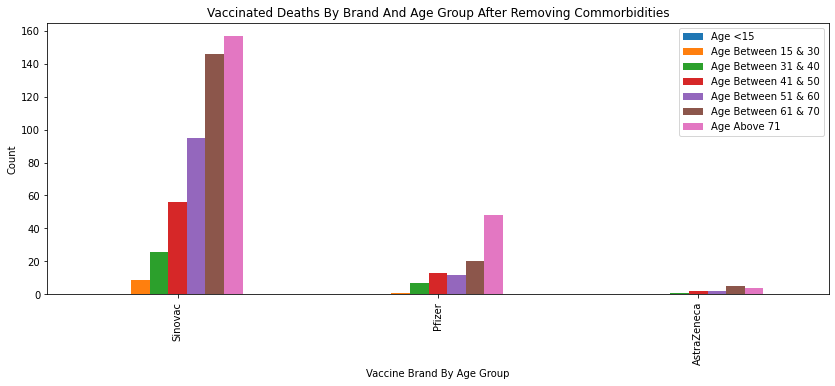

In [32]:
vaccine_deaths_by_age_group.plot(kind='bar', figsize=(14,5), x='Vaccine')
plt.ylabel('Count')
plt.xlabel('Vaccine Brand By Age Group')
plt.title('Vaccinated Deaths By Brand And Age Group After Removing Commorbidities')
plt.show()


In [33]:
# Some good news here:
print(f'If you took 2 doses of Sinovac, and without commorbidities, you have {covid_deaths_by_brand.Sinovac/covid_deaths_original.shape[0]*100:.2f}% chance of death by covid')
print(f'If you took 2 doses of Pfizer, and without commorbidities, you have {covid_deaths_by_brand.Pfizer/covid_deaths_original.shape[0]*100:.2f}% of death by covid')
print(f'If you took 2 doses of AstraZeneca, and without commorbidities, you have {covid_deaths_by_brand.AstraZeneca/covid_deaths_original.shape[0]*100:.2f}% of death by covid')

If you took 2 doses of Sinovac, and without commorbidities, you have 1.56% chance of death by covid
If you took 2 doses of Pfizer, and without commorbidities, you have 0.32% of death by covid
If you took 2 doses of AstraZeneca, and without commorbidities, you have 0.04% of death by covid


In [34]:
# Male vs Female Covid Death rates - original data without removing commorbidities or unvaccinated.
male_percentage = covid_deaths_original[covid_deaths_original["male"] == 1.0].male.sum() / covid_deaths_original.shape[0] * 100
female_percentage = 100 - male_percentage
print(f'Male Percentage of Death: {male_percentage:.2f}%')
print(f'Female Percentage of Death: {female_percentage:.2f}%')

Male Percentage of Death: 57.44%
Female Percentage of Death: 42.56%


In [35]:
# Male vs Female Covid Death rates 2 vaccine doses, removed commorbidities
male_percentage = covid_deaths[covid_deaths_original["male"] == 1.0].male.sum() / covid_deaths.shape[0] * 100
female_percentage = 100 - male_percentage
print(f'Male Percentage of Death - 2 vaccine doses, removed commorbidities: {male_percentage:.2f}%')
print(f'Female Percentage of Death - 2 vaccine doses, removed commorbidities: {female_percentage:.2f}%')

Male Percentage of Death - 2 vaccine doses, removed commorbidities: 66.12%
Female Percentage of Death - 2 vaccine doses, removed commorbidities: 33.88%


/tmp/ipykernel_13720/3421337934.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_percentage = covid_deaths[covid_deaths_original["male"] == 1.0].male.sum() / covid_deaths.shape[0] * 100
